In [73]:
from ipywidgets import *
import fastbook
from fastcore.all import *
from fastbook import search_images_ddg
from fastdownload import download_url
from fastai.vision.all import *
from fastai.vision import widgets
from fastai.vision import models
from fastai.vision.widgets import *
from time import sleep

fastbook.setup_book()

In [74]:
path = Path('images')

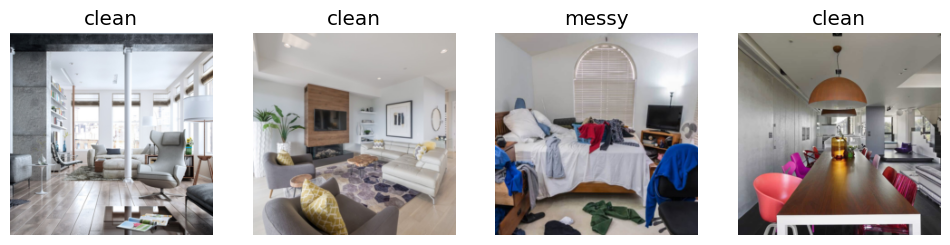

In [75]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

dls = data.dataloaders(path)

dls.valid.show_batch(max_n=4, nrows=1)

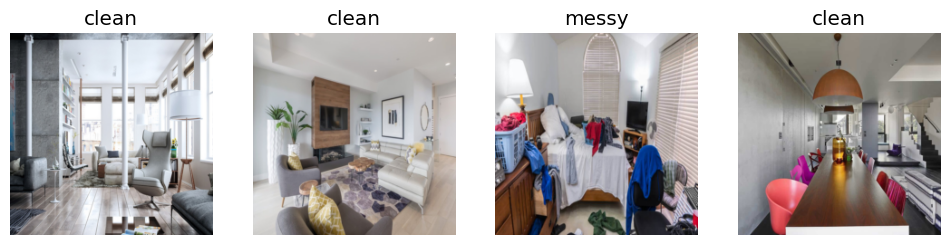

In [76]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

dls = data.dataloaders(path)

dls.valid.show_batch(max_n=4, nrows=1)

In [77]:
learn = vision_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.806191,0.205355,0.930818,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.332393,0.113241,0.949686,00:05
1,0.238126,0.135152,0.955975,00:05
2,0.189365,0.129973,0.949686,00:06
3,0.156062,0.133074,0.949686,00:06


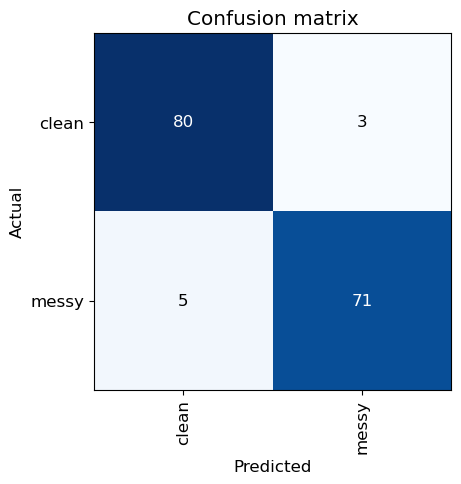

In [78]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

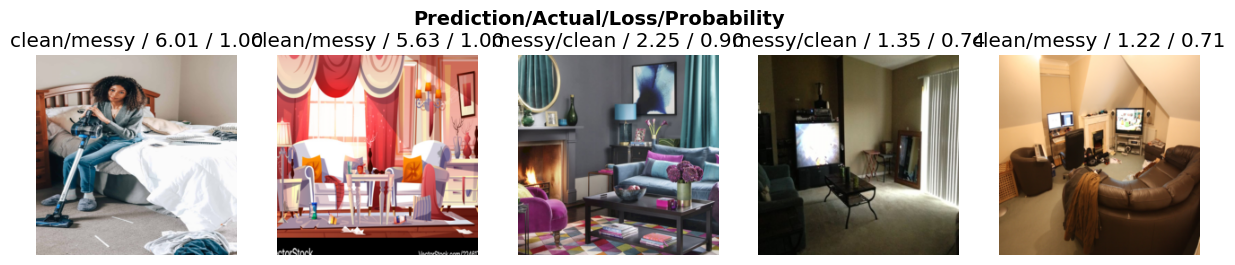

In [79]:
interp.plot_top_losses(5, nrows=1)

In [80]:
cleaner = ImageClassifierCleaner(learn)
cleaner

# Export Model

In [ ]:
learn.export()